# Image Augmentation with skimage in Python on full Dataset
* Notebook by Adam Lang
* Date: 3/1/2024
* We previously demonstrated the various techniques for image augmentation using skimage and numpy on 1 image. Now we will demonstrate how to do this on a full dataset.

# Steps we will take to perform image augmentation on full dataset
1. Load and pre-process data
2. Create training and validation sets
3. Augmentation of images
4. Define model architecture
5. Train model
6. Evaluate model performance

# 1. Loading and pre-processing the dataset

In [1]:
# import the libraries
import pandas as pd
import numpy as np
from skimage.io import imread
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# libraries for performing image augmentation tasks
from skimage.transform import rotate
from skimage.util import random_noise
from skimage.filters import gaussian
from skimage.transform import AffineTransform, warp

In [2]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
ls

drive/  sample_data/


In [9]:
cd Deep\ Learning\ Notebooks

/content/drive/MyDrive/Colab Notebooks/Deep Learning Notebooks


In [10]:
# use git commands to access file
!unzip Dataset.zip

Archive:  Dataset.zip
   creating: Dataset/
  inflating: Dataset/emergency_classification.csv  
   creating: Dataset/images/
  inflating: Dataset/images/0.jpg    
  inflating: Dataset/images/10.jpg   
  inflating: Dataset/images/1002.jpg  
  inflating: Dataset/images/1006.jpg  
  inflating: Dataset/images/1007.jpg  
  inflating: Dataset/images/1009.jpg  
  inflating: Dataset/images/1013.jpg  
  inflating: Dataset/images/1014.jpg  
  inflating: Dataset/images/1016.jpg  
  inflating: Dataset/images/1019.jpg  
  inflating: Dataset/images/102.jpg  
  inflating: Dataset/images/1020.jpg  
  inflating: Dataset/images/1022.jpg  
  inflating: Dataset/images/1023.jpg  
  inflating: Dataset/images/1026.jpg  
  inflating: Dataset/images/1031.jpg  
  inflating: Dataset/images/1035.jpg  
  inflating: Dataset/images/1036.jpg  
  inflating: Dataset/images/1037.jpg  
  inflating: Dataset/images/104.jpg  
  inflating: Dataset/images/1040.jpg  
  inflating: Dataset/images/1041.jpg  
  inflating: Dataset/

In [11]:
# read in csv file
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Deep Learning Notebooks/Dataset/emergency_classification.csv')

In [12]:
# create random seed generator for reproducibility
seed = 42

In [13]:
# load images and store in numpy array

# empty list to store images
X = []
# iterating over each image
for img_name in data.image_names:
  # load image using its name
  img = plt.imread('Dataset/images/' + img_name)
  # normalizing pixel values
  img = img/255
  # saving each image in the list
  X.append(img)

# converting list of images into array
X=np.array(X)

# storing target variable in separate variable
y = data.emergency_or_not.values

In [14]:
# shape of images and target
X.shape, y.shape

((2352, 224, 224, 3), (2352,))

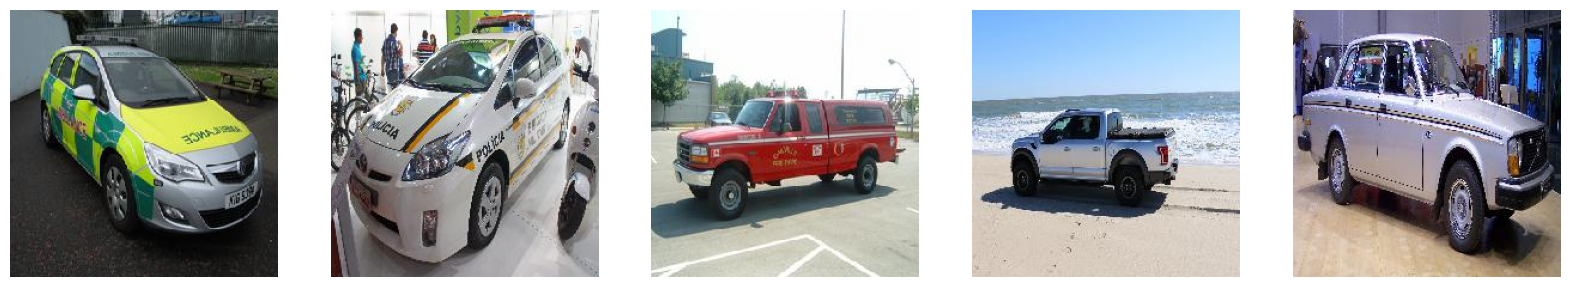

In [15]:
# visualize a few images
fig,ax = plt.subplots(nrows=1, ncols=5, figsize=(20,20))
for i in range(5):
  ax[i].imshow(X[i*400])
  ax[i].axis('off')


# 2. Create training and validation sets

In [16]:
# creating a training and validation set
X_train, X_valid, y_train, y_valid = train_test_split(X,y,test_size=0.3,random_state=seed)


In [17]:
# view shape of train and validation data sets
(X_train.shape, y_train.shape), (X_valid.shape, y_valid.shape)

(((1646, 224, 224, 3), (1646,)), ((706, 224, 224, 3), (706,)))

# 3. Augmenting the images

In [18]:
# augment the training data images
final_train_data = [] #store final train images in list
final_target_train = [] # store final target images in list
for i in tqdm(range(X_train.shape[0])):
  # original image
  final_train_data.append(X_train[i])
  # image rotation
  final_train_data.append(rotate(X_train[i], angle=30, mode='edge'))
  # image flipping - left to right
  final_train_data.append(np.flip(X_train[i]))
  # image flipping - up-down
  final_train_data.append(np.flip(X_train[i]))
  # image noising
  final_train_data.append(random_noise(X_train[i], var=0.2))
  for j in range(5): #appending same target 5 times
    final_target_train.append(y_train[i])

100%|██████████| 1646/1646 [00:21<00:00, 78.29it/s]


In [ ]:
# converting images and target to array
final_train = np.array(final_train_data)
final_target_train = np.array(final_target_train)

In [ ]:
# shape of new train
final_train.shape, final_target_train.shape

In [ ]:
# visualize the augmented images
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(20,20))
for i in range(5):
  ax[i].imshow(final_train[i+30])
  ax[i].axis('off')

In [ ]:
# converting 3 dim image to 1 dim image
final_train = final_train.reshape(final_train.shape[0], 224*224*3)
final_train.shape

In [ ]:
# min and max pixel values of training images
final_train.min(), final_train.max()

In [ ]:
# convert 3 dimensional validation image to 1 dim image
final_valid = X_valid.reshape(X_valid.shape[0], 224*224*3)
final_valid.shape

In [ ]:
# min and max pixel values of validation images
final_valid.min(), final_valid.max()

# 4. Define model architecture

In [ ]:
# import functions from keras to define neural network architecture
from keras.layers import Dense, InputLayer, Dropout, BatchNormalization
from keras.models import Sequential
# importing adam optimizer from keras optimizer module
from keras.optimizers import Adam

In [ ]:
# defining the adam optimizer and setting the learning rate to 10^-5
adam = Adam(learning_rate=1e-5)

In [ ]:
# define and compile model architecture
model=Sequential()

model.add(InputLayer(input_shape=(224*224*3,)))
model.add(Dense(100, activation='sigmoid'))
model.add(BatchNormalization())
model.add(Dropout(rate=0.5))
model.add(Dense(100, activation='sigmoid'))
model.add(BatchNormalization())
model.add(Dropout(rate=0.5))
model.add(Dense(units=1, activation='sigmoid'))


# compile model
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

In [ ]:
# print summary of model
model.summary()

# 5. Training the model

In [ ]:
# train model
model_history = model.fit(X_train, y_train, epochs=30, batch_size=128, validation_data=(X_valid, y_valid))

# 6. Evaluate model performance

In [ ]:
# accuracy on validation set
print('Accuracy on validation set: ', accuracy_score(y_valid, np.where(model.predict(final_valid)[:,0] < 0.5, 0, 1)))

In [ ]:
# summarize history loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [ ]:
# summarize history for accuracy
plt.plot(model_history['accuracy'])
plt.plot(model_history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()